<a href="https://colab.research.google.com/github/dyinghorizon/VR_Assignment1_Nishad_MT2024102/blob/main/Stitched_panorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt

In [2]:
def detect_keypoints(img1, img2):

    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    return kp1, kp2, good_matches

def display_image(img, title='Image'):
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 10))
    plt.imshow(rgb_img)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
# Uploaded image filenames
image_paths = ['/content/balcony_1.jpg', '/content/balcony_2.jpg', '/content/balcony_3.jpg', '/content/balcony_4.jpg']

images = []
for path in image_paths:
    img = cv2.imread(path)
    if img is not None:
        images.append(img)
        print(f"Successfully loaded: {path}")
    else:
        print(f"Failed to load: {path}")

if len(images) < 2:
    print("Need at least 2 images to stitch.")

Successfully loaded: /content/balcony_1.jpg
Successfully loaded: /content/balcony_2.jpg
Successfully loaded: /content/balcony_3.jpg
Successfully loaded: /content/balcony_4.jpg


In [9]:
stitcher = cv2.Stitcher_create()
status, panorama = stitcher.stitch(images)

Panorama created successfully!


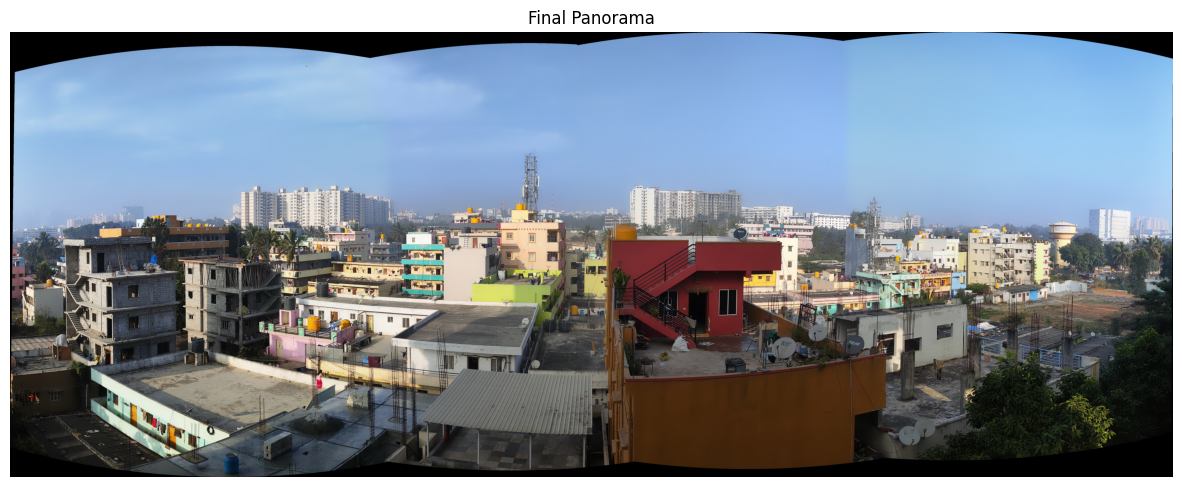

In [10]:
if status == cv2.Stitcher_OK:
  print("Panorama created successfully!")
display_image(panorama, 'Final Panorama')

In [11]:
# Keypoints and matches visualization for the first two images
img1, img2 = images[0], images[1]
kp1, kp2, good_matches = detect_keypoints(img1, img2)

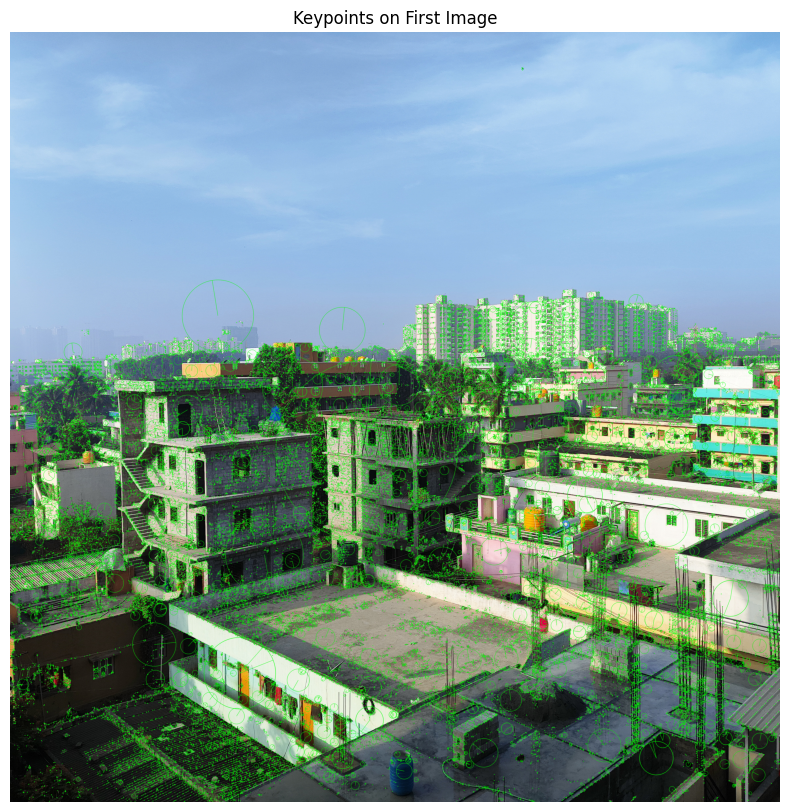

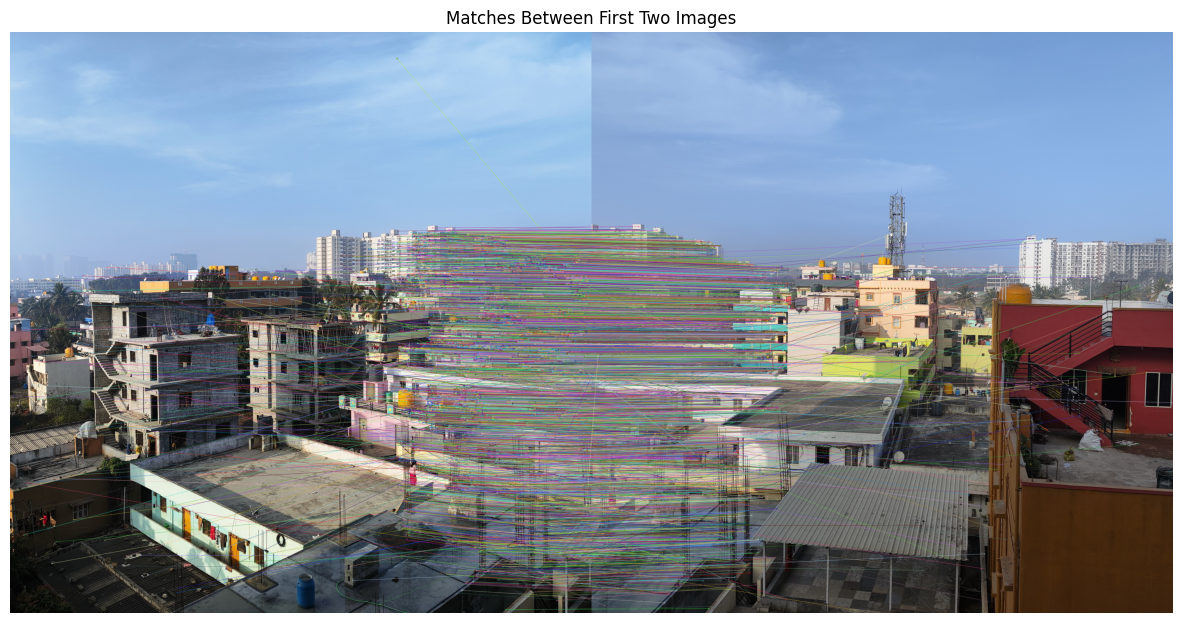

In [12]:
# Show keypoints on the first image
img_keypoints = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0),
                                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_image(img_keypoints, 'Keypoints on First Image')

# Matches between the first two images
matches_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None,
                                   flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
display_image(matches_img, 'Matches Between First Two Images')